In [1]:
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import requests
from pathlib import Path
import numpy as np
from joblib import Parallel, delayed
import psutil
NUM_CORES = psutil.cpu_count()

# A

## A)

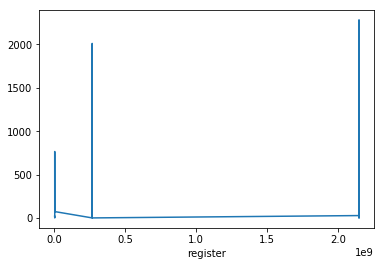

In [2]:
def validate_line(line):
    line = line.rstrip().split(' ')
    if len(line) == 2:
        if is_valid_op(line[0]) & is_valid_hexadecimal(line[1]):
            return [line[0], int(line[1], 16)]
    
def is_valid_op(op):
    if op not in ['0', '1', '2']:
        return False
    return True

def is_valid_hexadecimal(value):
    try:
        int(value, 16)
        return True
    except ValueError:
        return False
    
# Download file
url = "http://www.thesleepless.com/test/SiftMD/datafile.din"
response = requests.get(url, stream=True)

filename = Path("C:/Users/Dustin/Desktop/datafile.din")
if not filename.exists():
    with open(str(filename), "wb") as handle:
        for data in tqdm(response.iter_content()):
            handle.write(data)
            
# Parse file
cc_file = Parallel(n_jobs=NUM_CORES)(delayed(validate_line)(line) for line in open(str(filename), 'r').readlines())
cc_file = [x for x in cc_file if x is not None]

# Convert to dataframe
cc_file = pd.DataFrame(cc_file, columns=['op_type', 'register'])

# Bar plot of frequency by register
plot_data = cc_file.groupby('register').size().plot()

## B)

In [3]:
print(cc_file.groupby('op_type').size())

op_type
0    159631
1     83030
2    757341
dtype: int64


# B

## A)

In [4]:
import random
import timeit
def generate_matrix_int(rows, cols):
    return [[random.randint(0, 9) for x in range(cols)] for y in range(rows)]

def generate_matrix_dbl(rows, cols):
    return [[random.uniform(0, 9) for x in range(cols)] for y in range(rows)]

def mult_row(A, B):        
    if len(A[0]) != len(B):
        print('INVALID MATRICES')
        return
    
    n = len(A)
    m = len(A[0])
    p = len(B[0])
    
    C = [[0 for x in range(p)] for y in range(n)]
    for i in range(n):
        for j in range(p):
            val = 0
            for k in range(m):
                val = val + A[i][k]* B[k][j]
            C[i][j] = val
    return C

A_int = generate_matrix_int(348, 200)
A_dbl = generate_matrix_dbl(348, 200)

B_int = generate_matrix_int(200, 140)
B_dbl = generate_matrix_dbl(200, 140)

%timeit mult_row(A_int, B_int)
%timeit mult_row(A_dbl, B_dbl)

867 ms ± 13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
841 ms ± 7.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## B)

In [5]:
def mult_col(A, B):        
    if len(A[0]) != len(B):
        print('INVALID MATRICES')
        return
    
    n = len(A)
    m = len(A[0])
    p = len(B[0])
    
    C = [[0 for x in range(p)] for y in range(n)]
    for j in range(p):
        for i in range(n):
            val = 0
            for k in range(m):
                val = val + A[i][k]* B[k][j]
            C[i][j] = val
    return C



%timeit mult_col(A_int, B_int)
%timeit mult_col(A_dbl, B_dbl)

859 ms ± 7.32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
820 ms ± 17.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
